<a href="https://colab.research.google.com/github/Abhavya-Singh02/Pytorch/blob/main/Lecture_13_pytorch_rnn_based_qa_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd

In [74]:
df = pd.read_csv('/content/100_Unique_QA_Dataset.csv')

In [75]:
df.head()

,question,answer
0,What is the capital of France?,Paris
1,What is the capital of Germany?,Berlin
2,Who wrote 'To Kill a Mockingbird'?,Harper-Lee
3,What is the largest planet in our solar system?,Jupiter
4,What is the boiling point of water in Celsius?,100


# RNN doesnt understand text data. So, we need to convert the text data into vectors
## 1-> Tokenize
## 2-> vocab
## 3-> convert word to numerical indices

In [76]:
# tokenize
def tokenize(text):
  text = text.lower()
  text = text.replace("?","")
  text =  text.replace("'","")
  return text.split()

In [77]:
tokenize("What is your name?")

['what', 'is', 'your', 'name']

In [78]:
# vocab
vocab = {'<UNK>':0}

In [79]:
def buildVocab(textRow):
  tokenizedQuestion = tokenize(textRow['question'])
  tokenizedAnswer = tokenize(textRow['answer'])
  mergedTokens = tokenizedQuestion+tokenizedAnswer
  print(mergedTokens)

  for token in mergedTokens:
    if token not in vocab:
      vocab[token] = len(vocab)

In [80]:
df.apply(buildVocab, axis=1)

['what', 'is', 'the', 'capital', 'of', 'france', 'paris']
['what', 'is', 'the', 'capital', 'of', 'germany', 'berlin']
['who', 'wrote', 'to', 'kill', 'a', 'mockingbird', 'harper-lee']
['what', 'is', 'the', 'largest', 'planet', 'in', 'our', 'solar', 'system', 'jupiter']
['what', 'is', 'the', 'boiling', 'point', 'of', 'water', 'in', 'celsius', '100']
['who', 'painted', 'the', 'mona', 'lisa', 'leonardo-da-vinci']
['what', 'is', 'the', 'square', 'root', 'of', '64', '8']
['what', 'is', 'the', 'chemical', 'symbol', 'for', 'gold', 'au']
['which', 'year', 'did', 'world', 'war', 'ii', 'end', '1945']
['what', 'is', 'the', 'longest', 'river', 'in', 'the', 'world', 'nile']
['what', 'is', 'the', 'capital', 'of', 'japan', 'tokyo']
['who', 'developed', 'the', 'theory', 'of', 'relativity', 'albert-einstein']
['what', 'is', 'the', 'freezing', 'point', 'of', 'water', 'in', 'fahrenheit', '32']
['which', 'planet', 'is', 'known', 'as', 'the', 'red', 'planet', 'mars']
['who', 'is', 'the', 'author', 'of', '19

,0
0,None
1,None
2,None
3,None
4,None
...,...
85,None
86,None
87,None
88,None


In [81]:
len(vocab)

324

In [98]:
# convert words to numerical indices
def textToIndices(text, vocab):
  indexedText = []
  text = tokenize(text)

  for token in text:

    if token in vocab:
      indexedText.append(vocab[token])
    else:
      indexedText.append(vocab['<UNK>'])

  return indexedText

In [99]:
textToIndices("What is your name",vocab)

[1, 2, 0, 0]

In [92]:
vocab

{'<UNK>': 0,
 'what': 1,
 'is': 2,
 'the': 3,
 'capital': 4,
 'of': 5,
 'france': 6,
 'paris': 7,
 'germany': 8,
 'berlin': 9,
 'who': 10,
 'wrote': 11,
 'to': 12,
 'kill': 13,
 'a': 14,
 'mockingbird': 15,
 'harper-lee': 16,
 'largest': 17,
 'planet': 18,
 'in': 19,
 'our': 20,
 'solar': 21,
 'system': 22,
 'jupiter': 23,
 'boiling': 24,
 'point': 25,
 'water': 26,
 'celsius': 27,
 '100': 28,
 'painted': 29,
 'mona': 30,
 'lisa': 31,
 'leonardo-da-vinci': 32,
 'square': 33,
 'root': 34,
 '64': 35,
 '8': 36,
 'chemical': 37,
 'symbol': 38,
 'for': 39,
 'gold': 40,
 'au': 41,
 'which': 42,
 'year': 43,
 'did': 44,
 'world': 45,
 'war': 46,
 'ii': 47,
 'end': 48,
 '1945': 49,
 'longest': 50,
 'river': 51,
 'nile': 52,
 'japan': 53,
 'tokyo': 54,
 'developed': 55,
 'theory': 56,
 'relativity': 57,
 'albert-einstein': 58,
 'freezing': 59,
 'fahrenheit': 60,
 '32': 61,
 'known': 62,
 'as': 63,
 'red': 64,
 'mars': 65,
 'author': 66,
 '1984': 67,
 'george-orwell': 68,
 'currency': 69,
 'unit

In [100]:
import torch
from torch.utils.data import Dataset, DataLoader


In [103]:
class QADataset(Dataset):

  def __init__(self, df, vocab):
    self.df = df
    self.vocab = vocab

  def __len__(self):
    return self.df.shape[0]

  def __getitem__(self, index):
      numericalQues = textToIndices(self.df.loc[index]['question'],vocab)
      numericalAns = textToIndices(self.df.loc[index]['answer'],vocab)

      return torch.tensor(numericalQues), torch.tensor(numericalAns)

In [104]:
dataset = QADataset(df, vocab)

In [105]:
dataset[0]

(tensor([1, 2, 3, 4, 5, 6]), tensor([7]))

In [106]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [107]:
for question, answer in dataloader:
  print(question,answer)

tensor([[ 10,  29, 130, 131]]) tensor([[132]])
tensor([[10, 96,  3, 97]]) tensor([[98]])
tensor([[ 10,  75, 111]]) tensor([[112]])
tensor([[  1,   2,   3, 146, 147,  19, 148]]) tensor([[149]])
tensor([[ 42,   2,   3, 274, 211, 275]]) tensor([[276]])
tensor([[10, 75, 76]]) tensor([[77]])
tensor([[  1,   2,   3,   4,   5, 113]]) tensor([[114]])
tensor([[ 10,  96,   3, 104, 239]]) tensor([[240]])
tensor([[ 1,  2,  3,  4,  5, 73]]) tensor([[74]])
tensor([[ 1,  2,  3, 92, 93, 94]]) tensor([[95]])
tensor([[10, 11, 12, 13, 14, 15]]) tensor([[16]])
tensor([[ 42, 216, 118, 217, 218,  19,  14, 219,  43]]) tensor([[220]])
tensor([[10, 55,  3, 56,  5, 57]]) tensor([[58]])
tensor([[  1,   2,   3, 103,   5, 104,  19, 105]]) tensor([[106]])
tensor([[  1,   2,   3,  33,  34,   5, 245]]) tensor([[246]])
tensor([[ 1,  2,  3, 59, 25,  5, 26, 19, 60]]) tensor([[61]])
tensor([[10,  2,  3, 66,  5, 67]]) tensor([[68]])
tensor([[  1,   2,   3, 180, 181, 182, 183]]) tensor([[184]])
tensor([[ 78,  79, 150, 151,

In [108]:
import torch.nn as nn

In [110]:
dataset[0]

(tensor([1, 2, 3, 4, 5, 6]), tensor([7]))

In [111]:
x = embedding=nn.Embedding(324, embedding_dim=50)

In [117]:
a = x(dataset[0][0])

In [116]:
x(dataset[0][0]).shape

torch.Size([6, 50])

In [118]:
y = nn.RNN(50,64)

In [119]:
y(a)

(tensor([[-6.4963e-01, -3.1873e-01, -4.6974e-01, -2.9010e-01, -2.4266e-01,
           2.2637e-02, -2.8860e-01,  1.5407e-01,  1.7323e-01, -5.0168e-02,
           5.7326e-02,  4.8380e-02, -3.7181e-01, -2.5103e-01, -3.5411e-01,
          -1.6406e-01, -1.6502e-01,  5.6371e-02,  2.4339e-01, -6.3807e-02,
           1.6734e-01,  6.9809e-02, -6.0606e-01, -1.5075e-02, -8.4837e-01,
           2.6643e-01,  6.5515e-01, -4.0007e-01,  1.8318e-01,  4.2532e-02,
           2.7854e-01,  8.4213e-01, -7.7147e-01, -1.1949e-01,  1.8367e-01,
          -7.6414e-01, -3.3621e-02,  6.5753e-01, -9.9751e-02,  3.9022e-01,
           4.3642e-01,  3.5788e-01,  4.9025e-01, -2.0194e-01,  1.3458e-01,
          -3.3896e-01, -3.1379e-01, -6.1360e-01,  1.3734e-01, -4.2492e-01,
           3.0568e-01, -2.4896e-01,  3.5851e-01,  2.7869e-01, -4.4729e-01,
          -8.4291e-02,  1.0774e-01,  6.3716e-01, -6.6891e-02, -1.1278e-01,
           4.3816e-03,  2.3506e-01,  2.4145e-01, -3.3196e-01],
         [ 4.7372e-01,  1.5227e-01,  

In [120]:
# hidden state
y(a)[0].shape

torch.Size([6, 64])

In [121]:
# final output
y(a)[1].shape

torch.Size([1, 64])

In [125]:
b = y(a)[1] # final output


In [126]:
z = nn.Linear(64,324)

In [128]:
z(b).shape

torch.Size([1, 324])

In [145]:
class SimpleRNN(nn.Module):
  def __init__(self,vocab_size):
    super().__init__()
    self.embedding=nn.Embedding(vocab_size, embedding_dim=50)
    self.rnn=nn.RNN(50,64,batch_first=True)
    self.fc=nn.Linear(64,vocab_size)

  def forward(self,question):
    embeddedQuestion = self.embedding(question)
    hidden, final = self.rnn(embeddedQuestion)
    output = self.fc(final.squeeze(0))

    return output

In [146]:
lr = 0.001
epochs = 20

In [147]:
model = SimpleRNN(len(vocab))


In [148]:
criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=lr)

In [149]:
# training loop
for epoch in range(epochs):
  totalLoss = 0

  for question, answer in dataloader:

    optimizer.zero_grad()

    # forward pass
    output=model(question)

    # loss
    loss=criterion(output,answer[0])

    # gradients
    loss.backward()

    #update
    optimizer.step()

    totalLoss += loss.item()
  print(f"Epoch: {epoch+1}, Loss: {totalLoss:4F}")

Epoch: 1, Loss: 524.705461
Epoch: 2, Loss: 458.714234
Epoch: 3, Loss: 379.620546
Epoch: 4, Loss: 317.302427
Epoch: 5, Loss: 267.097161
Epoch: 6, Loss: 218.855247
Epoch: 7, Loss: 174.361311
Epoch: 8, Loss: 136.884482
Epoch: 9, Loss: 104.270066
Epoch: 10, Loss: 78.728674
Epoch: 11, Loss: 60.446567
Epoch: 12, Loss: 46.837113
Epoch: 13, Loss: 37.178437
Epoch: 14, Loss: 29.961423
Epoch: 15, Loss: 24.686950
Epoch: 16, Loss: 20.553543
Epoch: 17, Loss: 17.477392
Epoch: 18, Loss: 14.816428
Epoch: 19, Loss: 12.852184
Epoch: 20, Loss: 11.295908


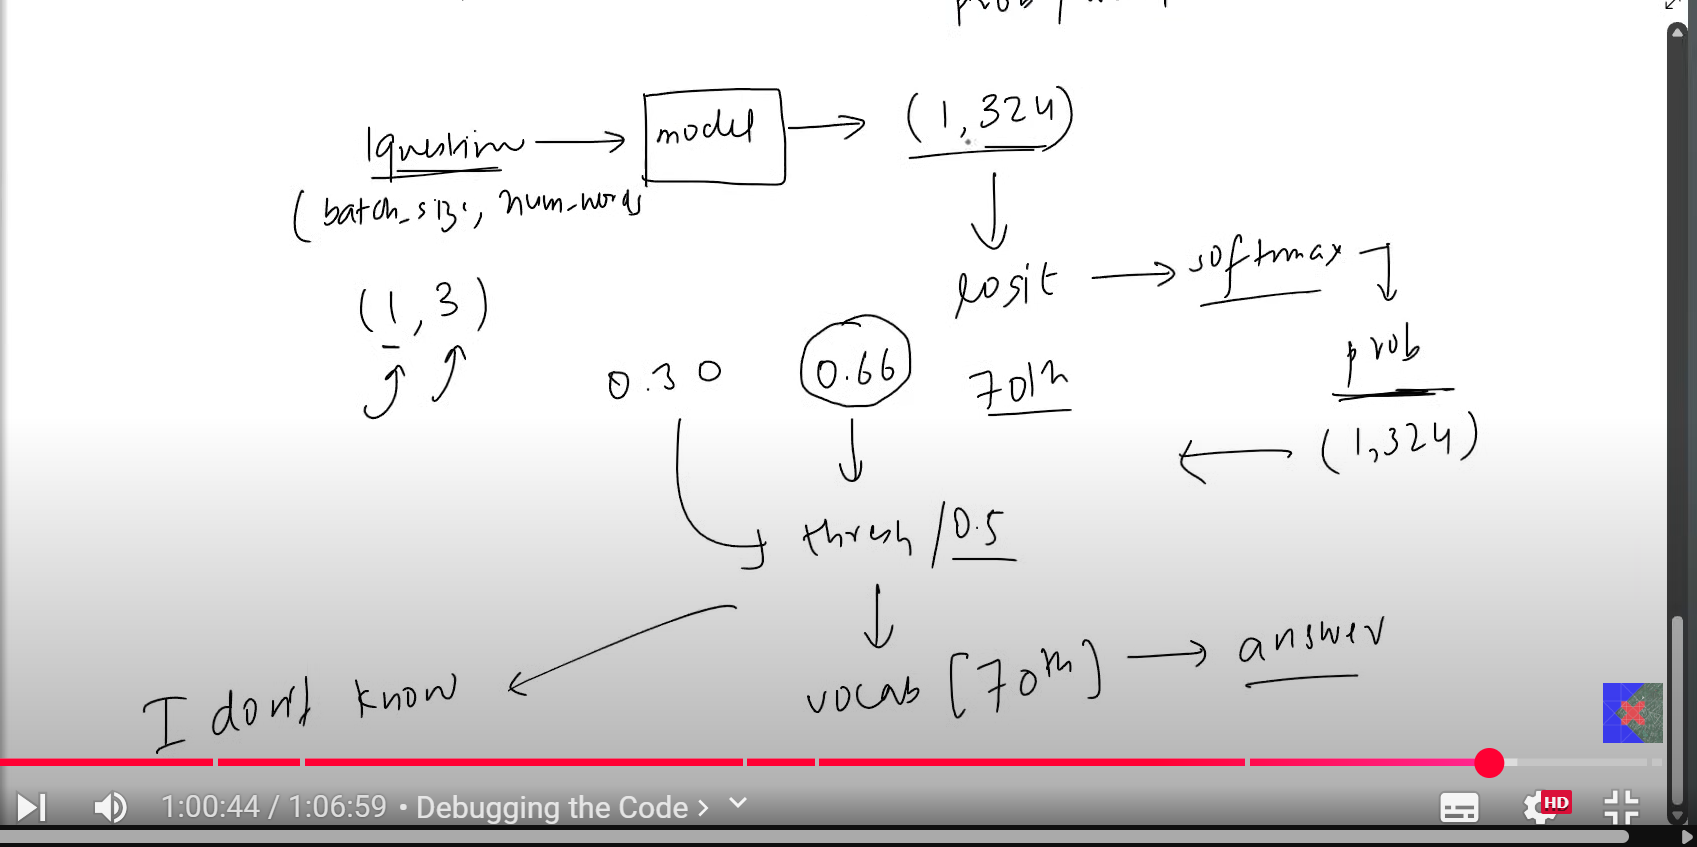

In [166]:
def predict(model, question, threshold=.5):
  #convert question to numbers
  numericalQues = textToIndices(question,vocab)

  #tensor
  questionTensor = torch.tensor(numericalQues).unsqueeze(0) # for batch size

  #send to model
  output = model(questionTensor) # -> logit

  # convert logit to probabilities
  probs = torch.nn.functional.softmax(output,dim=1)

  # find max probs
  value, index = torch.max(probs,dim=1)
  print(value)


  if value<threshold:
    print("I dont know")

  print(list(vocab.keys())[index])

In [167]:
predict(model,"What is the capital of France")

tensor([0.9059], grad_fn=<MaxBackward0>)
paris


In [168]:
len(vocab)

324